In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Handwriting classification using multilayer perceptron model

## 1. Dataset from scikit-learn

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

# load the dataset
digits = load_digits()    # 1,979 image data (8 x 8 = 64 pixels, 0(white) ~ 15(black))

In [3]:
# print the first image (matrix, target)
print(digits.images[0]), print(digits.target[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


(None, None)

In [4]:
# print the total number of images
print("total number of samples: {}".format(len(digits.images)))

total number of samples: 1797


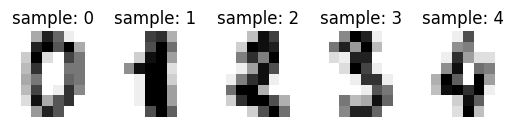

In [5]:
# visualize the first five images
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
  plt.subplot(1, 5, index+1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('sample: %i' % label)

In [6]:
# another format of image matrix
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


The 'data' attribute contains image data as a vector of 64 dimensions, rather than an 8x8 matrix. We will use this as X for subsequent models.

In [7]:
# define X and y
X = digits.data
y = digits.target

In [8]:
# print information on X and y
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(1797, 64)
(1797,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## 2. Multilayer perceptron classifier



In [9]:
import torch
import torch.nn as nn
from torch import optim

In [10]:
# model
model = nn.Sequential(
    nn.Linear(64, 32),    # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16),    # hidden_layer1 = 32, hidden_layer2 = 16
    nn.ReLU(),
    nn.Linear(16, 10)     # hidden_layer2 = 16, output_layer = 10
)

In [11]:
# make X and y tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [12]:
# loss function
loss_fn = nn.CrossEntropyLoss()   # cross entropy function used

In [13]:
# optimizer
optimizer = optim.Adam(model.parameters())

In [14]:
# list for losses
losses = []

In [15]:
# model training
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X)     # forward calculation
  loss = loss_fn(y_pred, y)
  loss.backward()       # backward calculation
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, 100, loss.item()
    ))

  losses.append(loss.item())

Epoch    0/100 Cost: 2.667803
Epoch   10/100 Cost: 2.159264
Epoch   20/100 Cost: 1.983704
Epoch   30/100 Cost: 1.767036
Epoch   40/100 Cost: 1.508456
Epoch   50/100 Cost: 1.205289
Epoch   60/100 Cost: 0.895521
Epoch   70/100 Cost: 0.637018
Epoch   80/100 Cost: 0.462880
Epoch   90/100 Cost: 0.350912


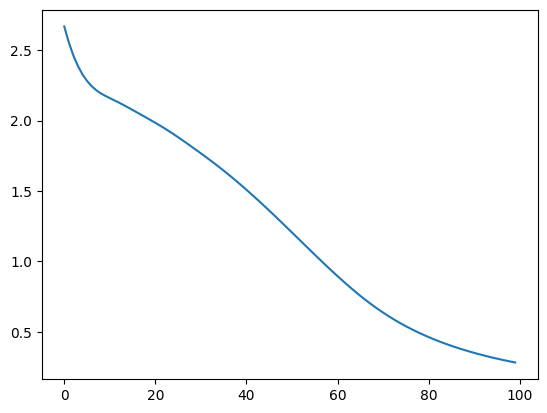

In [16]:
plt.plot(losses);